In [1]:
!pwd

/content


In [2]:
!ls

sample_data


In [4]:
!touch data.txt

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
def load(filename):
    data = np.loadtxt(filename, skiprows=1, unpack=True).T
    np.random.seed(12345)
    np.random.shuffle(data)
    x_raw = data[:, 0:2]
    x_min = x_raw.min(axis=0)
    x_max = x_raw.max(axis=0)
    # Rescale data between -0.5 and 0.5
    x = (x_raw - x_min) / (x_max - x_min) - 0.5
    y = data[:, 2].astype(int).reshape(-1, 1)
    return (x, y)

In [7]:
X, Y = load("data.txt")
X_train, X_validation, X_test = np.split(X, 3)
Y_train, Y_validation, Y_test = np.split(Y, 3)

In [36]:
def makeDF(X,Y):
  color=["blue","red"]
  color=list(map(lambda y:color[y],Y.flatten()))
  Xdf=pd.DataFrame(X)
  Ydf=pd.DataFrame(Y)
  colordf=pd.DataFrame(color)
  df=pd.concat([Xdf,Ydf,colordf],axis=1)
  df.columns=(["X1","X2","Y","color"])
  return df

In [38]:
dfData=makeDF(X,Y)
dfTrain=makeDF(X_train,Y_train)
dfVal=makeDF(X_validation,Y_validation)
dfTest=makeDF(X_test,Y_test)

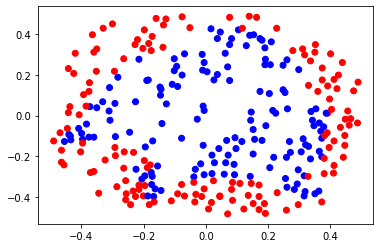

In [45]:
plt.scatter(dfTrain["X1"],dfTrain["X2"],color=dfTrain["color"])
plt.show()